# pandas 快速入门 



本讲义基于 pandas 官方文档 [10 Minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html) 编写，结合中文读者习惯进行注释与讲解。

## 目录

- 对象创建
- 查看数据
- 选择数据
- 缺失值处理
- 运算
- 数据导入导出
- 索引
- 分组
- 连接
- 绘图
- 时间序列
- Categorical
- Plotting
- Getting data in/out

## 导入 pandas 和 numpy

In [5]:
import pandas as pd
import numpy as np

## 对象创建

### 创建 Series

In [6]:
s = pd.Series([1, 3, 5, np.nan, 6, 8])
s

0    1.0
1    3.0
2    5.0
3    NaN
4    6.0
5    8.0
dtype: float64

### 创建 DataFrame

In [7]:
dates = pd.date_range("20130101", periods=6)
dates

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [8]:
df = pd.DataFrame(np.random.randn(6,4), index=dates, columns=list("ABCD"))
df

,A,B,C,D
2013-01-01,-0.520585,0.481536,-0.351331,-1.362496
2013-01-02,0.312901,1.507186,-0.652097,1.137791
2013-01-03,-0.873238,-1.893483,1.224852,-0.119387
2013-01-04,-0.488614,-0.179749,0.023712,1.182711
2013-01-05,0.237155,0.709768,-0.467694,-0.855296
2013-01-06,-0.257989,-1.401546,1.692584,-0.928318


### 由 dict 创建 DataFrame

In [9]:
df2 = pd.DataFrame({
    "A": 1.,
    "B": pd.Timestamp('20130102'),
    "C": pd.Series(1, index=list(range(4)), dtype="float32"),
    "D": np.array([3] * 4, dtype="int32"),
    "E": pd.Categorical(["test", "train", "test", "train"]),
    "F": "foo"
})
df2

,A,B,C,D,E,F
0,1.0,2013-01-02,1.0,3,test,foo
1,1.0,2013-01-02,1.0,3,train,foo
2,1.0,2013-01-02,1.0,3,test,foo
3,1.0,2013-01-02,1.0,3,train,foo


### 查看各列数据类型

In [10]:
df2.dtypes

A          float64
B    datetime64[s]
C          float32
D            int32
E         category
F           object
dtype: object

## 查看数据

### 查看头尾行

In [11]:
df.head()

,A,B,C,D
2013-01-01,-0.520585,0.481536,-0.351331,-1.362496
2013-01-02,0.312901,1.507186,-0.652097,1.137791
2013-01-03,-0.873238,-1.893483,1.224852,-0.119387
2013-01-04,-0.488614,-0.179749,0.023712,1.182711
2013-01-05,0.237155,0.709768,-0.467694,-0.855296


In [12]:
df.tail(3)

,A,B,C,D
2013-01-04,-0.488614,-0.179749,0.023712,1.182711
2013-01-05,0.237155,0.709768,-0.467694,-0.855296
2013-01-06,-0.257989,-1.401546,1.692584,-0.928318


### 显示索引、列名和底层 numpy 数据

In [13]:
df.index

DatetimeIndex(['2013-01-01', '2013-01-02', '2013-01-03', '2013-01-04',
               '2013-01-05', '2013-01-06'],
              dtype='datetime64[ns]', freq='D')

In [14]:
df.columns

Index(['A', 'B', 'C', 'D'], dtype='object')

In [15]:
df.to_numpy()

array([[-0.52058527,  0.48153608, -0.35133101, -1.36249633],
       [ 0.31290141,  1.50718565, -0.65209664,  1.13779112],
       [-0.87323811, -1.8934827 ,  1.22485201, -0.11938684],
       [-0.48861365, -0.17974916,  0.02371156,  1.18271133],
       [ 0.23715514,  0.70976824, -0.46769407, -0.8552958 ],
       [-0.25798935, -1.40154591,  1.69258428, -0.92831789]])

### 描述性统计汇总

In [16]:
df.describe()

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.265062,-0.129381,0.245004,-0.157499
std,0.462917,1.302976,0.977027,1.096220
min,-0.873238,-1.893483,-0.652097,-1.362496
25%,-0.512592,-1.096097,-0.438603,-0.910062
50%,-0.373301,0.150893,-0.163810,-0.487341
75%,0.113369,0.652710,0.924567,0.823497
max,0.312901,1.507186,1.692584,1.182711


### 数据转置

In [17]:
df.T

,2013-01-01,2013-01-02,2013-01-03,2013-01-04,2013-01-05,2013-01-06
A,-0.520585,0.312901,-0.873238,-0.488614,0.237155,-0.257989
B,0.481536,1.507186,-1.893483,-0.179749,0.709768,-1.401546
C,-0.351331,-0.652097,1.224852,0.023712,-0.467694,1.692584
D,-1.362496,1.137791,-0.119387,1.182711,-0.855296,-0.928318


### 按轴排序

In [18]:
df.sort_index(axis=1, ascending=False)

,D,C,B,A
2013-01-01,-1.362496,-0.351331,0.481536,-0.520585
2013-01-02,1.137791,-0.652097,1.507186,0.312901
2013-01-03,-0.119387,1.224852,-1.893483,-0.873238
2013-01-04,1.182711,0.023712,-0.179749,-0.488614
2013-01-05,-0.855296,-0.467694,0.709768,0.237155
2013-01-06,-0.928318,1.692584,-1.401546,-0.257989


In [19]:
df.sort_values(by="B")

,A,B,C,D
2013-01-03,-0.873238,-1.893483,1.224852,-0.119387
2013-01-06,-0.257989,-1.401546,1.692584,-0.928318
2013-01-04,-0.488614,-0.179749,0.023712,1.182711
2013-01-01,-0.520585,0.481536,-0.351331,-1.362496
2013-01-05,0.237155,0.709768,-0.467694,-0.855296
2013-01-02,0.312901,1.507186,-0.652097,1.137791


## 选择数据

### 选择单列

In [20]:
df["A"]

2013-01-01   -0.520585
2013-01-02    0.312901
2013-01-03   -0.873238
2013-01-04   -0.488614
2013-01-05    0.237155
2013-01-06   -0.257989
Freq: D, Name: A, dtype: float64

### 通过切片选取多行（行标签）

In [21]:
df[0:3]

,A,B,C,D
2013-01-01,-0.520585,0.481536,-0.351331,-1.362496
2013-01-02,0.312901,1.507186,-0.652097,1.137791
2013-01-03,-0.873238,-1.893483,1.224852,-0.119387


In [22]:
df["20130102":"20130104"]

,A,B,C,D
2013-01-02,0.312901,1.507186,-0.652097,1.137791
2013-01-03,-0.873238,-1.893483,1.224852,-0.119387
2013-01-04,-0.488614,-0.179749,0.023712,1.182711


### 使用标签（loc）选择
- 精确选取行/列

In [23]:
df.loc[dates[0]]

A   -0.520585
B    0.481536
C   -0.351331
D   -1.362496
Name: 2013-01-01 00:00:00, dtype: float64

In [24]:
df.loc[:, ["A", "B"]]

,A,B
2013-01-01,-0.520585,0.481536
2013-01-02,0.312901,1.507186
2013-01-03,-0.873238,-1.893483
2013-01-04,-0.488614,-0.179749
2013-01-05,0.237155,0.709768
2013-01-06,-0.257989,-1.401546


In [25]:
df.loc["20130102":"20130104", ["A", "B"]]

,A,B
2013-01-02,0.312901,1.507186
2013-01-03,-0.873238,-1.893483
2013-01-04,-0.488614,-0.179749


In [26]:
df.loc[dates[0], ["A", "B"]]

A   -0.520585
B    0.481536
Name: 2013-01-01 00:00:00, dtype: float64

In [27]:
df.loc[dates[0], "A"]

-0.5205852732718299

In [28]:
df.at[dates[0], "A"]

-0.5205852732718299

### 按位置（iloc）选取
- 类似于 numpy 的索引

In [29]:
df.iloc[3]

A   -0.488614
B   -0.179749
C    0.023712
D    1.182711
Name: 2013-01-04 00:00:00, dtype: float64

In [30]:
df.iloc[3:5, 0:2]

,A,B
2013-01-04,-0.488614,-0.179749
2013-01-05,0.237155,0.709768


In [31]:
df.iloc[[1,2,4], [0,2]]

,A,C
2013-01-02,0.312901,-0.652097
2013-01-03,-0.873238,1.224852
2013-01-05,0.237155,-0.467694


In [32]:
df.iloc[1:3, :]
df.iloc[:, 1:3]

,B,C
2013-01-01,0.481536,-0.351331
2013-01-02,1.507186,-0.652097
2013-01-03,-1.893483,1.224852
2013-01-04,-0.179749,0.023712
2013-01-05,0.709768,-0.467694
2013-01-06,-1.401546,1.692584


In [33]:
df.iat[1, 1]

1.5071856526966947

### 布尔索引
- 条件筛选

In [34]:
df[df["A"] > 0]

,A,B,C,D
2013-01-02,0.312901,1.507186,-0.652097,1.137791
2013-01-05,0.237155,0.709768,-0.467694,-0.855296


In [35]:
df[df > 0]

,A,B,C,D
2013-01-01,NaN,0.481536,NaN,NaN
2013-01-02,0.312901,1.507186,NaN,1.137791
2013-01-03,NaN,NaN,1.224852,NaN
2013-01-04,NaN,NaN,0.023712,1.182711
2013-01-05,0.237155,0.709768,NaN,NaN
2013-01-06,NaN,NaN,1.692584,NaN


In [36]:
df2 = df.copy()
df2["E"] = ["one", "one", "two", "three", "four", "three"]
df2

,A,B,C,D,E
2013-01-01,-0.520585,0.481536,-0.351331,-1.362496,one
2013-01-02,0.312901,1.507186,-0.652097,1.137791,one
2013-01-03,-0.873238,-1.893483,1.224852,-0.119387,two
2013-01-04,-0.488614,-0.179749,0.023712,1.182711,three
2013-01-05,0.237155,0.709768,-0.467694,-0.855296,four
2013-01-06,-0.257989,-1.401546,1.692584,-0.928318,three


In [37]:
df2[df2["E"].isin(["two", "four"])]

,A,B,C,D,E
2013-01-03,-0.873238,-1.893483,1.224852,-0.119387,two
2013-01-05,0.237155,0.709768,-0.467694,-0.855296,four


## 缺失值处理
pandas 使用 `np.nan` 代表缺失值。
可以用 `dropna` 删除含有缺失值的行，或者用 `fillna` 填充。

In [38]:
df1 = df.reindex(index=dates[0:4], columns=list(df.columns) + ["E"])
df1.loc[dates[0]:dates[1], "E"] = 1
df1

,A,B,C,D,E
2013-01-01,-0.520585,0.481536,-0.351331,-1.362496,1.0
2013-01-02,0.312901,1.507186,-0.652097,1.137791,1.0
2013-01-03,-0.873238,-1.893483,1.224852,-0.119387,NaN
2013-01-04,-0.488614,-0.179749,0.023712,1.182711,NaN


In [39]:
df1.dropna(how="any")

,A,B,C,D,E
2013-01-01,-0.520585,0.481536,-0.351331,-1.362496,1.0
2013-01-02,0.312901,1.507186,-0.652097,1.137791,1.0


In [40]:
df1.fillna(value=5)

,A,B,C,D,E
2013-01-01,-0.520585,0.481536,-0.351331,-1.362496,1.0
2013-01-02,0.312901,1.507186,-0.652097,1.137791,1.0
2013-01-03,-0.873238,-1.893483,1.224852,-0.119387,5.0
2013-01-04,-0.488614,-0.179749,0.023712,1.182711,5.0


In [41]:
pd.isna(df1)

,A,B,C,D,E
2013-01-01,False,False,False,False,False
2013-01-02,False,False,False,False,False
2013-01-03,False,False,False,False,True
2013-01-04,False,False,False,False,True


## 运算

pandas 支持类似 numpy 的各类算术运算，且会自动对齐不同索引。

In [42]:
df.mean()

A   -0.265062
B   -0.129381
C    0.245004
D   -0.157499
dtype: float64

In [43]:
df.mean(axis=1)

2013-01-01   -0.438219
2013-01-02    0.576445
2013-01-03   -0.415314
2013-01-04    0.134515
2013-01-05   -0.094017
2013-01-06   -0.223817
Freq: D, dtype: float64

In [44]:
s = pd.Series([1, 3, 5, np.nan, 6, 8], index=dates).shift(2)
df.sub(s, axis="index")

,A,B,C,D
2013-01-01,NaN,NaN,NaN,NaN
2013-01-02,NaN,NaN,NaN,NaN
2013-01-03,-1.873238,-2.893483,0.224852,-1.119387
2013-01-04,-3.488614,-3.179749,-2.976288,-1.817289
2013-01-05,-4.762845,-4.290232,-5.467694,-5.855296
2013-01-06,NaN,NaN,NaN,NaN


## Apply 方法
- 自定义函数应用于行或列

In [45]:
df.apply(np.cumsum)

,A,B,C,D
2013-01-01,-0.520585,0.481536,-0.351331,-1.362496
2013-01-02,-0.207684,1.988722,-1.003428,-0.224705
2013-01-03,-1.080922,0.095239,0.221424,-0.344092
2013-01-04,-1.569536,-0.084510,0.245136,0.838619
2013-01-05,-1.332380,0.625258,-0.222558,-0.016677
2013-01-06,-1.590370,-0.776288,1.470026,-0.944994


In [46]:
df.apply(lambda x: x.max() - x.min())

A    1.186140
B    3.400668
C    2.344681
D    2.545208
dtype: float64

## 直方图统计

In [47]:
s = pd.Series(np.random.randint(0, 7, size=10))
s.value_counts()

6    5
5    2
3    1
1    1
4    1
Name: count, dtype: int64

## 字符串方法
- Series 字符串方法自动适配缺失值。

In [48]:
s = pd.Series(["A", "B", "C", "Aaba", "Baca", np.nan, "CABA", "dog", "cat"])
s.str.lower()

0       a
1       b
2       c
3    aaba
4    baca
5     NaN
6    caba
7     dog
8     cat
dtype: object

## 合并
### 拼接

In [49]:
df = pd.DataFrame(np.random.randn(10, 4))
pieces = [df[:3], df[3:7], df[7:]]
pd.concat(pieces)

,0,1,2,3
0,0.149451,-1.716458,1.540956,-1.478438
1,-0.788580,0.942535,0.860695,1.277974
2,1.529843,0.978873,1.681723,0.128001
3,-1.031891,-0.645625,-0.101714,-0.894796
4,-1.341019,-0.400039,0.293592,-1.754958
5,-0.018467,-0.688119,0.063590,0.081667
6,0.042298,0.433534,0.509931,0.708851
7,0.631839,1.985047,0.612073,0.114068
8,1.433401,-0.619146,1.581860,-1.031054
9,1.029629,0.266897,-0.649012,0.456147


### merge（类似 SQL join）

In [50]:
left = pd.DataFrame({'key': ['foo', 'bar'], 'lval': [1, 2]})
right = pd.DataFrame({'key': ['foo', 'bar'], 'rval': [4, 5]})
pd.merge(left, right, on='key')

,key,lval,rval
0,foo,1,4
1,bar,2,5


## 分组 groupby
- split-apply-combine
- 统计、聚合、转换

In [51]:
df = pd.DataFrame({
    'A': ['foo', 'bar', 'foo', 'bar', 'foo', 'bar', 'foo', 'foo'],
    'B': ['one', 'one', 'two', 'three', 'two', 'two', 'one', 'three'],
    'C': np.random.randn(8),
    'D': np.random.randn(8)
})
df.groupby('A').sum()

,B,C,D
A,,,
bar,onethreetwo,-2.510037,1.483046
foo,onetwotwoonethree,2.931827,-2.711364


In [52]:
df.groupby(['A', 'B']).sum()

C         D
A   B                        
bar one   -1.279562 -0.243084
    three -0.183928 -0.697683
    two   -1.046547  2.423813
foo one    1.735463 -3.088498
    three  0.289137  0.215364
    two    0.907227  0.161770

## Reshaping
- Stack/unstack
- Pivot tables

In [53]:
tuples = list(zip(*[['bar', 'bar', 'baz', 'baz',
                    'foo', 'foo', 'qux', 'qux'],
                   ['one', 'two', 'one', 'two',
                    'one', 'two', 'one', 'two']]))
index = pd.MultiIndex.from_tuples(tuples, names=['first', 'second'])
df = pd.DataFrame(np.random.randn(8, 2), index=index, columns=['A', 'B'])
df2 = df[:4]
df2

A         B
first second                    
bar   one     1.185040  0.718365
      two     0.680732  0.058235
baz   one     1.726562 -0.828623
      two    -0.362360  0.716046

In [54]:
stacked = df2.stack()
stacked

first  second   
bar    one     A    1.185040
               B    0.718365
       two     A    0.680732
               B    0.058235
baz    one     A    1.726562
               B   -0.828623
       two     A   -0.362360
               B    0.716046
dtype: float64

In [55]:
stacked.unstack()

A         B
first second                    
bar   one     1.185040  0.718365
      two     0.680732  0.058235
baz   one     1.726562 -0.828623
      two    -0.362360  0.716046

In [56]:
stacked.unstack(1)

second        one       two
first                      
bar   A  1.185040  0.680732
      B  0.718365  0.058235
baz   A  1.726562 -0.362360
      B -0.828623  0.716046

In [57]:
stacked.unstack(0)

first          bar       baz
second                      
one    A  1.185040  1.726562
       B  0.718365 -0.828623
two    A  0.680732 -0.362360
       B  0.058235  0.716046

### Pivot tables（透视表）

In [58]:
df = pd.DataFrame({
    "A": ["one", "one", "two", "three"] * 3,
    "B": ["A", "B", "C"] * 4,
    "C": np.random.randn(12),
    "D": np.random.randn(12)
})
pd.pivot_table(df, values='D', index=['A', 'B'], columns=['C'])

C        -1.269507  -1.163112  -0.359637  -0.353797  -0.100903   0.162224  \
A     B                                                                     
one   A        NaN        NaN  -0.374013        NaN   0.191885        NaN   
      B        NaN        NaN        NaN        NaN        NaN        NaN   
      C   0.069504        NaN        NaN        NaN        NaN        NaN   
three A        NaN        NaN        NaN        NaN        NaN        NaN   
      B        NaN        NaN        NaN        NaN        NaN        NaN   
      C        NaN        NaN        NaN        NaN        NaN  -0.813397   
two   A        NaN        NaN        NaN        NaN        NaN        NaN   
      B        NaN  -1.001614        NaN        NaN        NaN        NaN   
      C        NaN        NaN        NaN  -0.216438        NaN        NaN   

C         0.385348   0.504784   0.538580   0.647929   1.090241   2.017582  
A     B                                                                    
one   A        NaN        NaN        NaN        NaN        NaN        NaN  
      B  -0.837664        NaN        NaN        NaN   -0.53223        NaN  
      C        NaN        NaN   1.184217        NaN        NaN        NaN  
three A        NaN        NaN        NaN   0.025075        NaN        NaN  
      B        NaN  -0.050209        NaN        NaN        NaN        NaN  
      C        NaN        NaN        NaN        NaN        NaN        NaN  
two   A        NaN        NaN        NaN        NaN        NaN   1.881732  
      B        NaN        NaN        NaN        NaN        NaN        NaN  
      C        NaN        NaN        NaN        NaN        NaN        NaN

## 时间序列

In [59]:
rng = pd.date_range('1/1/2012', periods=100, freq='S')
ts = pd.Series(np.random.randint(0, 500, len(rng)), index=rng)
ts.resample('5Min').sum()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_56080\2503940574.py:1: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  rng = pd.date_range('1/1/2012', periods=100, freq='S')


2012-01-01    24577
Freq: 5min, dtype: int32

In [60]:
rng = pd.date_range('3/6/2012 00:00', periods=5, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts_utc = ts.tz_localize('UTC')
ts_utc

2012-03-06 00:00:00+00:00   -0.960792
2012-03-07 00:00:00+00:00   -2.119477
2012-03-08 00:00:00+00:00   -0.038033
2012-03-09 00:00:00+00:00   -0.125605
2012-03-10 00:00:00+00:00   -0.893517
Freq: D, dtype: float64

In [61]:
ts_utc.tz_convert('US/Eastern')

2012-03-05 19:00:00-05:00   -0.960792
2012-03-06 19:00:00-05:00   -2.119477
2012-03-07 19:00:00-05:00   -0.038033
2012-03-08 19:00:00-05:00   -0.125605
2012-03-09 19:00:00-05:00   -0.893517
Freq: D, dtype: float64

### 时间区间和频率转换

In [62]:
rng = pd.date_range('1/1/2012', periods=5, freq='M')
ts = pd.Series(np.random.randn(len(rng)), index=rng)
ts

C:\Users\Administrator\AppData\Local\Temp\ipykernel_56080\3446765465.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  rng = pd.date_range('1/1/2012', periods=5, freq='M')


2012-01-31   -0.054797
2012-02-29    1.442388
2012-03-31    0.846941
2012-04-30    0.750070
2012-05-31   -0.466189
Freq: ME, dtype: float64

In [63]:
ps = ts.to_period()
ps

2012-01   -0.054797
2012-02    1.442388
2012-03    0.846941
2012-04    0.750070
2012-05   -0.466189
Freq: M, dtype: float64

In [64]:
ps.to_timestamp()

2012-01-01   -0.054797
2012-02-01    1.442388
2012-03-01    0.846941
2012-04-01    0.750070
2012-05-01   -0.466189
Freq: MS, dtype: float64

In [65]:
prng = pd.period_range('1990Q1', '2000Q4', freq='Q-NOV')
ts = pd.Series(np.random.randn(len(prng)), index=prng)
ts.head()

1990Q1   -0.275693
1990Q2   -1.237097
1990Q3    0.617560
1990Q4    1.263013
1991Q1   -1.938149
Freq: Q-NOV, dtype: float64

In [67]:
ts.index = ts.index.asfreq('M', how='end')
ts.head()

1990-02   -0.275693
1990-05   -1.237097
1990-08    0.617560
1990-11    1.263013
1991-02   -1.938149
Freq: M, dtype: float64

## Categoricals

In [68]:
df = pd.DataFrame({"id": [1, 2, 3, 4, 5, 6],
                   "raw_grade": ["a", "b", "b", "a", "a", "e"]})
df["grade"] = df["raw_grade"].astype("category")
df["grade"]

0    a
1    b
2    b
3    a
4    a
5    e
Name: grade, dtype: category
Categories (3, object): ['a', 'b', 'e']

In [71]:
df["grade"] = df["grade"].cat.set_categories(["very good", "good", "very bad"])
df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (3, object): ['very good', 'good', 'very bad']

In [72]:
df["grade"] = df["grade"].cat.set_categories(["very bad", "bad", "medium", "good", "very good"])
df["grade"]

0    NaN
1    NaN
2    NaN
3    NaN
4    NaN
5    NaN
Name: grade, dtype: category
Categories (5, object): ['very bad', 'bad', 'medium', 'good', 'very good']

In [73]:
df.sort_values(by="grade")

,id,raw_grade,grade
0,1,a,NaN
1,2,b,NaN
2,3,b,NaN
3,4,a,NaN
4,5,a,NaN
5,6,e,NaN


In [74]:
df.groupby("grade").size()

C:\Users\Administrator\AppData\Local\Temp\ipykernel_56080\3951628473.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("grade").size()


grade
very bad     0
bad          0
medium       0
good         0
very good    0
dtype: int64

## 绘图
pandas 集成了 Matplotlib，可直接用 `.plot()` 快速画图。

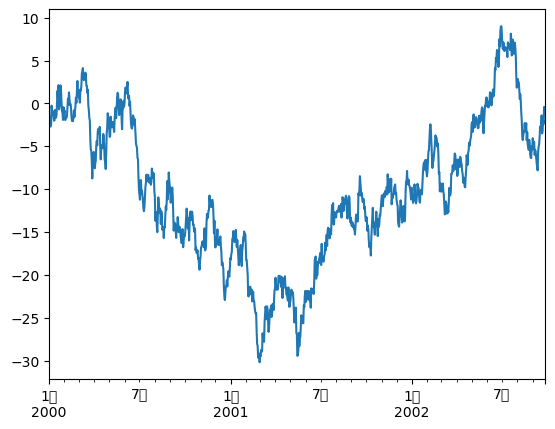

In [77]:
import matplotlib.pyplot as plt
import warnings

with warnings.catch_warnings():
	warnings.simplefilter("ignore")
	ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2000', periods=1000))
	ts = ts.cumsum()
	ts.plot()
	plt.show()

c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26376 (\N{CJK UNIFIED IDEOGRAPH-6708}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


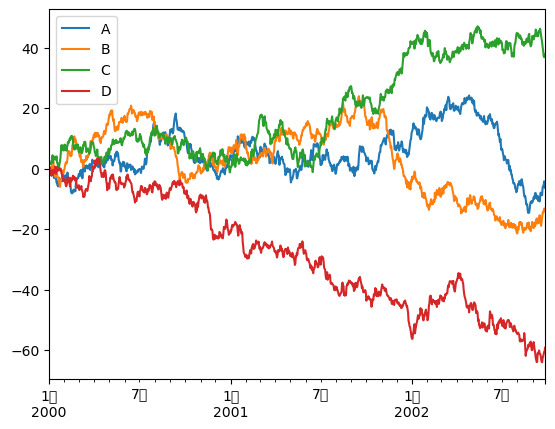

In [78]:
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=list("ABCD"))
df = df.cumsum()
df.plot()
plt.show()

## 数据读写
- 支持多种格式导入导出：CSV, HDF5, Excel, SQL, JSON 等

In [79]:
# 写入 CSV
df.to_csv('foo.csv')
# 读取 CSV
pd.read_csv('foo.csv').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.332295,0.167448,1.819971,0.262984
1,2000-01-02,-1.154339,-0.795782,1.476187,-0.507846
2,2000-01-03,-0.130460,0.149241,1.797390,0.417354
3,2000-01-04,-1.573087,0.423807,1.720803,-0.492286
4,2000-01-05,-1.842675,0.541527,1.728333,-1.907499


In [80]:
# 写入 Excel
df.to_excel('foo.xlsx', sheet_name='Sheet1')
# 读取 Excel
pd.read_excel('foo.xlsx', 'Sheet1').head()

,Unnamed: 0,A,B,C,D
0,2000-01-01,-0.332295,0.167448,1.819971,0.262984
1,2000-01-02,-1.154339,-0.795782,1.476187,-0.507846
2,2000-01-03,-0.130460,0.149241,1.797390,0.417354
3,2000-01-04,-1.573087,0.423807,1.720803,-0.492286
4,2000-01-05,-1.842675,0.541527,1.728333,-1.907499
